In [61]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [62]:
X, Y =  make_blobs(n_samples=500,
    n_features=2,
    centers=5,
    shuffle=True,
    random_state=3)

In [63]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


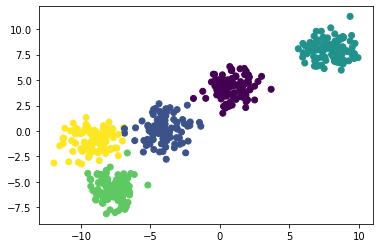

In [64]:
plt.scatter(X[:, 0], X[:, 1], c = Y);

### K Means 

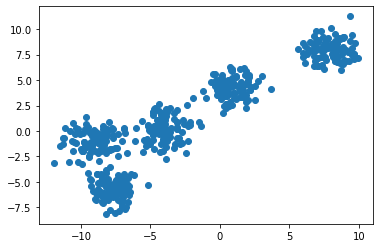

In [65]:
plt.scatter(X[:, 0], X[:, 1]);

In [66]:
import numpy as np

In [67]:
k = 5
color = ['red', 'blue', 'green', 'orange', 'yellow']

clusters = {}

for i in range(k):
    center =  20*(np.random.random((2,)) - 0.5)
    clusters[i] = {
        'center' : center,
        'points' : [],
        'color' : color[i]
    }

In [68]:
clusters

{0: {'center': array([3.52769133, 4.94944147]), 'points': [], 'color': 'red'},
 1: {'center': array([-3.06096354,  6.90750933]),
  'points': [],
  'color': 'blue'},
 2: {'center': array([ 1.16748412, -7.4921839 ]),
  'points': [],
  'color': 'green'},
 3: {'center': array([7.42753473, 9.25600543]),
  'points': [],
  'color': 'orange'},
 4: {'center': array([8.22444405, 6.18839939]),
  'points': [],
  'color': 'yellow'}}

In [69]:
def plotClusters():   
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        plt.scatter(pts[:, 0], pts[:, 1], color = clusters[i]['color'])
        plt.scatter(clusters[i]['center'][0], clusters[i]['center'][1], marker="^")
    plt.show() 

In [70]:
def distance(p2, p1):
    return np.sum((p2 - p1)**2)**.5

def assingPointsToClusters(clusters, X):
    m = X.shape[0]
    
    for i in range(m):
        dist = []
        for j in range(k):
            d = distance(X[i], clusters[j]['center'])
            dist.append(d)
        cluster_idx = np.argmin(dist)
        clusters[cluster_idx]['points'].append(X[i])

def updateClusterCenters(clusters):
    
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        
        if pts.shape[0] > 0:
            new_coordinates = np.mean(pts, axis = 0)
            clusters[i]['center'] = new_coordinates
            clusters[i]['points'] = []
            

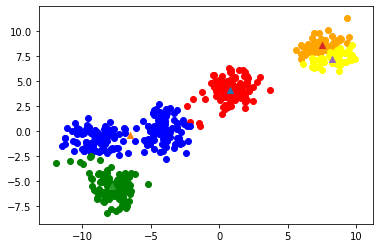

In [82]:
assingPointsToClusters(clusters, X)
plotClusters()
updateClusterCenters(clusters)

### K-Means using sklearn

In [90]:
from sklearn.cluster import KMeans

In [91]:
kmeans = KMeans(n_clusters=5)

In [92]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [95]:
centers = kmeans.cluster_centers_

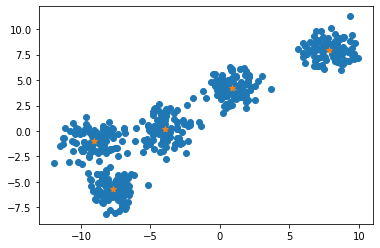

In [97]:
plt.scatter(X[:, 0],X[:, 1])
plt.scatter(centers[:, 0], centers[:, 1],marker="*");